LINEAR REGRESSION MODEL IMPLEMENTATION

In [1]:
import numpy as np

In [12]:
class Linear_Regression:
    def __init__(self,learning_rate , no_of_iterations):
        self.learning_rate = learning_rate
        self.no_of_iterations = no_of_iterations
    
    def fit(self , X , Y):
        #Get the no of columns and rows of the training data
        self.m , self.n = X.shape
        #According the provided dataset it returns (30 , 2)
        #Initialize the weight and Bias

        self.w = np.zeros(self.n)
        self.b = 0

        self.X = X
        self.Y = Y

        for i in range(self.no_of_iterations):
            self.update_weights()
    
    def update_weights(self):
        #Get the predicted Data 
        Y_prediction = self.predict(self.X)
        #No find the partial derivative i.e dw and db to do Gradient Descent
        dw = (-2 * (self.X.T).dot(self.Y - Y_prediction)) / self.m
        db = (-2 * np.sum(self.Y - Y_prediction)) / self.m
        #Both db and dw is not using self because it is not accessed anywhere other than this function.

        #Update the Weights and Bias 
        self.w = self.w - self.learning_rate * dw
        self.b = self.b - self.learning_rate * db

    def predict(self , X):
        return X.dot(self.w) + self.b

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 

In [5]:
salary_data = pd.read_csv('salary_data.csv')

In [6]:
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [7]:
salary_data.tail()

,YearsExperience,Salary
25,9.0,105582
26,9.5,116969
27,9.6,112635
28,10.3,122391
29,10.5,121872


In [8]:
salary_data.shape

(30, 2)

In [10]:
X = salary_data.iloc[:,:-1].values
Y = salary_data.iloc[:,1].values

In [13]:
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size= 0.33 , random_state=2)
#Random state is used for reproducibility of the same train test split in each time running repeatedly.  
model = Linear_Regression(learning_rate=0.02 , no_of_iterations= 1000)
model.fit(X_train , Y_train)
print("Weights = " , model.w[0])
print("Bias = " , model.b)

Weights =  9514.400999035135
Bias =  23697.406507136307


In [15]:
'''
Now the equation actually looks like 
Y = wX + b  ===>  Y = 9514 * X + 23697 for Feature1
Similarly for every Feature in the Target.
'''

'\nNow the equation actually looks like \nY = wX + b  ===>  Y = 9514 * X + 23697 for Feature1\nSimilarly for every Feature in the Target.\n'

In [16]:
test_data_prediction = model.predict(X_test)

Text(0.5, 1.0, 'Work Experience VS salary')

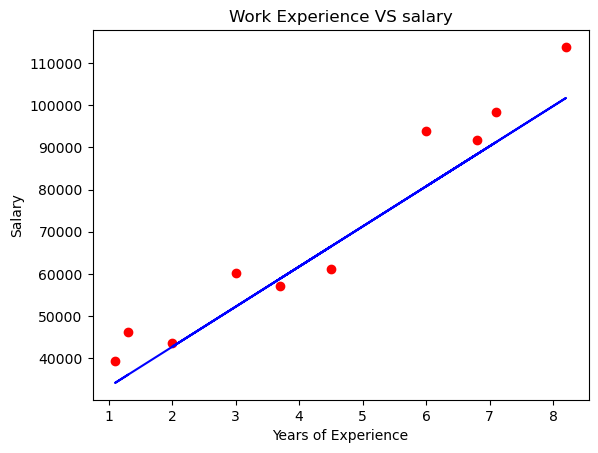

In [17]:
plt.scatter(X_test , Y_test , color = 'red')
plt.plot(X_test , test_data_prediction , color = 'blue')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Work Experience VS salary")

In [18]:
#Thats it . Its done. The Above is a Simple visualization of How Linear Regression actually work BTS. 